# Chirp to ROC
This notebook applies some ML binary classification techniques to a simple 2D dataset and looks at the results with "confusion dots" and ROC plots.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# to reload the custom library
from imp import reload
# custom library
import chirp_roc_lib as chp

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.5, 5.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### (Re)Load the custom routines

In [3]:
reload(chp)

<module 'chirp_roc_lib' from '/home/dd/Documents/Python/chirp-to-ROC/chirp_roc_lib.py'>

### The 2D "diagonal chirp"

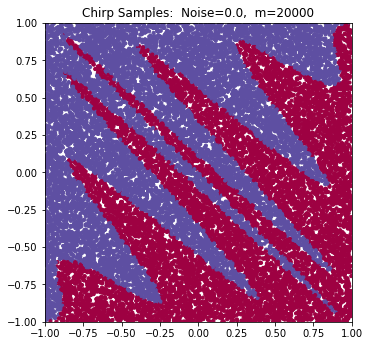

In [4]:
# Show the chirp model with no noise and many samples
show_noise=0.0
X_show, y_show = chp.make_chirp(n_out=20000, nhalfcycles=6.5, noise=show_noise, symmetric=False)

chp.plot_Xy(X_show, y_show, title="Chirp Samples:  Noise={},  m={}".format(show_noise,len(y_show)),
                                   s = 10)

### Training and Test sets
The "test" set is very large to get an accurate measure of the model performance.

In [5]:
# Size of the Training and Test sets...
m_train = 500
m_test = 10000

In [6]:
# Could use an sklearn generator, e.g., make_moons, to generate X,Ys:
# Training set
##train_X, train_Y = sklearn.datasets.make_moons(n_samples=m_train, noise=0.2)
# Test set
##test_X, test_Y = sklearn.datasets.make_moons(n_samples=m_test, noise=0.2)

In [7]:
# Use the chirp to generate the training and test sets

# Using: nhalfcycles=6.5, warpexp=0.65, symmetric=False, noise=0.035;  this noise limits accuracy to ~ 85 % .

# Training set
X_train, y_train = chp.make_chirp(n_out=m_train, nhalfcycles=6.5, noise=0.035, symmetric=False)
# Test set
X_test, y_test = chp.make_chirp(n_out=m_test, nhalfcycles=6.5, noise=0.035, symmetric=False)

In [8]:
# The sizes and types of the training and test sets
print(X_train.shape, X_train.dtype, y_train.shape, y_train.dtype, X_test.shape, y_test.shape)

(500, 2) float64 (500,) float64 (10000, 2) (10000,)


In [9]:
# example values
print( X_train[0,:], y_train[0])

[ 0.40274326 -0.28861248] 1.0


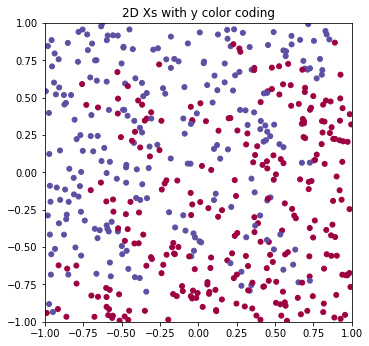

In [10]:
   chp.plot_Xy(X_train, y_train)

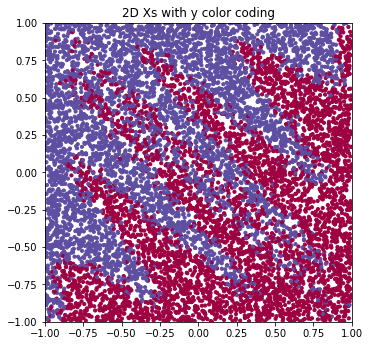

In [11]:
   chp.plot_Xy(X_test, y_test, s=10)

## Pick a Model

- - -
### Random model

In [12]:
# just flip a (uniform from 0 to 1) coin
y_score = np.random.rand(len(y_test))

In [13]:
# --> Now go below to "Show model performance"
# spoiler:
# Accuracy =  49.71 %
#      AOC = 0.500

### Really simple model

In [14]:
# Really simple model - no training needed:
# more likely to be y=1 (blue) when x1 is larger, map x1 to 0 to 1:
y_score = 0.5 * (X_test[:, 1] + 1.0)

In [15]:
# --> Now go below to "Show model performance"
# spoiler:
# Accuracy =  65.37 %
#      AOC = 0.727

### Logistic Regression Model

In [16]:
# Let's fit the model
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1e5, verbose=0)
model.fit( X_train, y_train )
print(model)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [17]:
# Get the 0 to 1 score (for y=1, hence the [:,1])
y_score = model.predict_proba(X_test)[:,1]

In [18]:
y_score

array([0.2839652 , 0.28175891, 0.09518552, ..., 0.84584595, 0.78914795,
       0.65970946])

In [19]:
# --> Now go below to "Show model performance"
# spoiler:
# Accuracy =  75.03 %
#      AOC = 0.817

- - -
## Show the model performance

### Confusion Matrix, Confusion Dots, and ROC

In [20]:
# Look at the distribution of y_score (for fun)
##import seaborn as sns
##sns.distplot(y_score, kde=False, rug=False)


Confusion matrix:

   Predicted   0.0   1.0
Actual                 
0.0          3742  1181
1.0          1316  3761

Results:

 False Pos =  23.989437334958357 %
 False Neg =  25.920819381524524 %
    Recall =  74.07918061847548 %
 Precision =  76.10279239174423 %

    Accuracy =  75.03 %
 Pos. fract. =  50.77 %


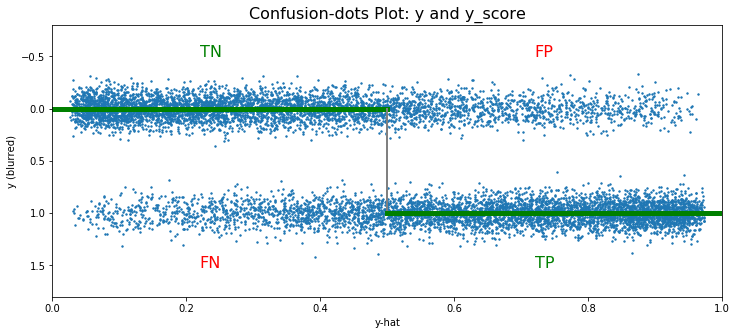

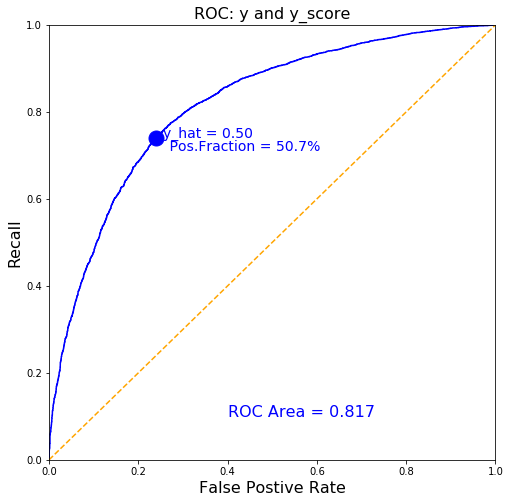

In [21]:
# How does the y_score do?
ysframe = chp.y_yhat_plots(y_test, y_score)

In [22]:
##ysframe.head(5)

In [23]:
##ysframe.tail(5)

### Show how the model assigned classes

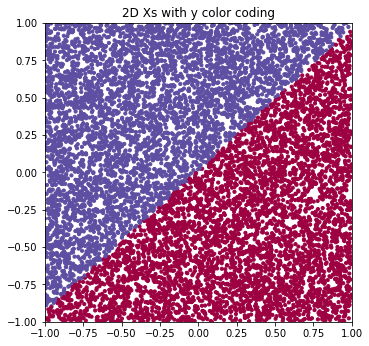

In [24]:
y_pred = 1*(y_score > 0.5)
chp.plot_Xy(X_test, y_pred, s=10)

### Using sklearn

In [25]:
# Confusion matrix
##from sklearn.metrics import confusion_matrix
##conf_matrix = confusion_matrix(y_test,y_pred)
##conf_matrix

In [26]:
# generate an accuracy score by comparing expected to predicted.
##from sklearn.metrics import accuracy_score
##accuracy = accuracy_score(y_test, y_pred)
##print( "Accuracy = " + str( accuracy ) )